In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

In [196]:
# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/wine.csv"
df = pd.read_csv(url)

df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [198]:
# 컬럼명 확인
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [200]:
# 레이블 갯수 확인 (숫자)
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [202]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [204]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [206]:
# 특성과 레이블 분리
X = df.drop('Wine', axis=1)
y = df['Wine']

In [208]:
# 데이터 분할 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
# 특성 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 머신러닝 4가지 모델

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### 랜덤 포레스트

Random Forest Accuracy: 1.0000


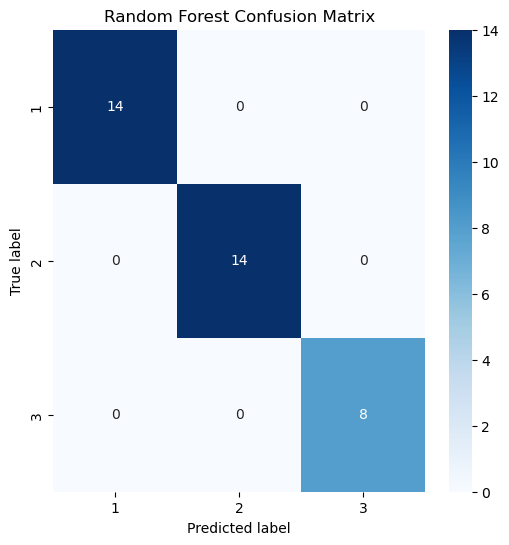

In [216]:
# 모델 정의 및 훈련 (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 예측
rf_y_pred = rf_model.predict(X_test)

# 정확도 평가
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 혼동 행렬 시각화
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Random Forest Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### SVM 

SVM Accuracy: 1.0000


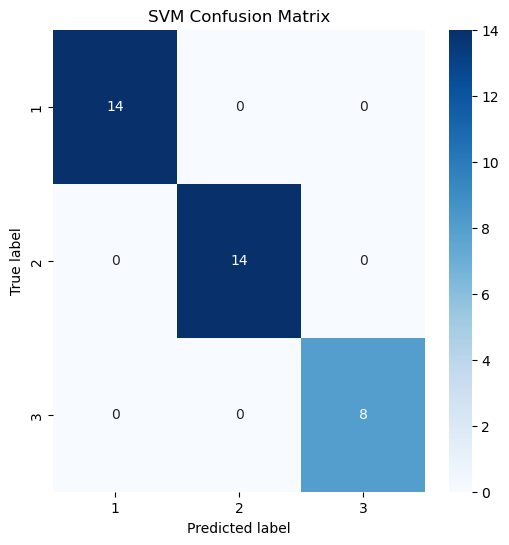

In [219]:
# 모델 정의 및 훈련 (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
svm_y_pred = svm_model.predict(X_test)

# 정확도 평가
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# 혼동 행렬 시각화
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("SVM Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 로지스틱 회귀

Logistic Regression Accuracy: 1.0000


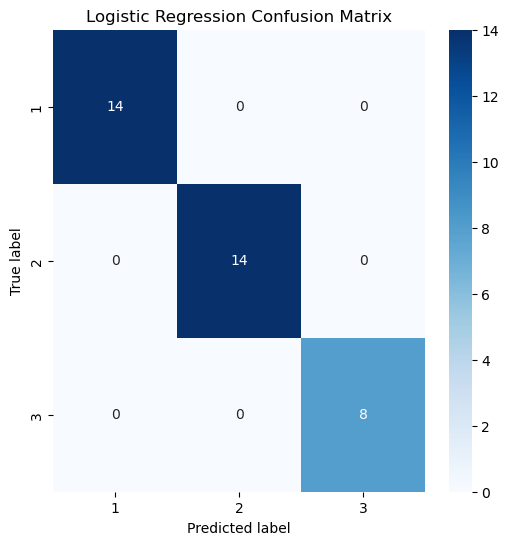

In [222]:
# 모델 정의 및 훈련 (Logistic Regression)
lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)

# 예측
lr_y_pred = lr_model.predict(X_test)

# 정확도 평가
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# 혼동 행렬 시각화
lr_cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 결정 트리

Decision Tree Accuracy: 0.9444


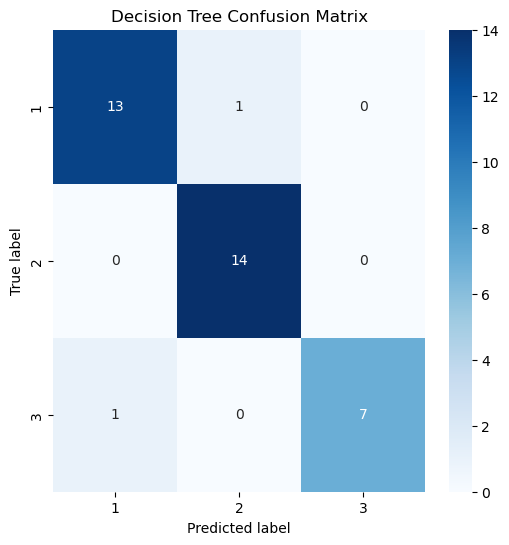

In [225]:
# 모델 정의 및 훈련 (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측
dt_y_pred = dt_model.predict(X_test)

# 정확도 평가
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# 혼동 행렬 시각화
dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Decision Tree Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### KNN

KNN Accuracy: 0.9444


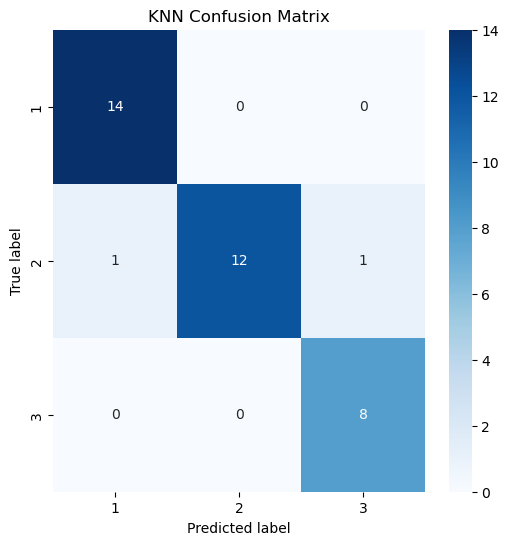

In [228]:
# 모델 정의 및 훈련 (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# 예측
knn_y_pred = knn_model.predict(X_test)

# 정확도 평가
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# 혼동 행렬 시각화
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("KNN Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 딥러닝

In [231]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [233]:
# 원-핫 인코딩
Y = pd.get_dummies(y).values  

In [235]:
# 딥러닝 입력을 위해 Numpy로 변환
X = X.values

In [237]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [239]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [241]:
Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [245]:
#Defining the model 
# 딥러닝 모델 정의
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 다중 클래스 분류 문제

model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [247]:
# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.4878 - loss: 60.9222 - val_accuracy: 0.4444 - val_loss: 13.1210
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4041 - loss: 7.6414 - val_accuracy: 0.3611 - val_loss: 7.5625
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5050 - loss: 4.5495 - val_accuracy: 0.7500 - val_loss: 2.5375
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5263 - loss: 5.4318 - val_accuracy: 0.1944 - val_loss: 7.7940
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4013 - loss: 4.8728 - val_accuracy: 0.7500 - val_loss: 1.2900
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4900 - loss: 2.1582 - val_accuracy: 0.5833 - val_loss: 1.5695
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5915 - loss: 2.0751 - val_accuracy: 0.3333 - val_loss: 4.3740
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4513 - loss: 2.2186 - val_accuracy: 0.5278 - val_loss: 2.82

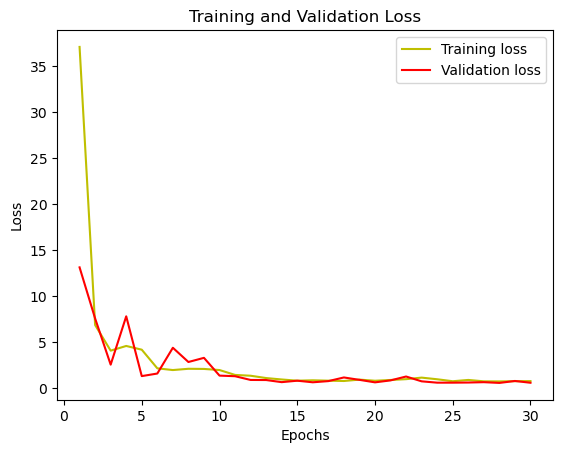

In [249]:
# 손실과 정확도 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

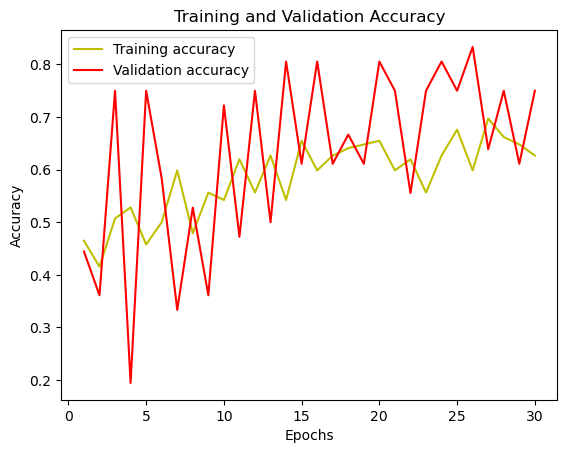

In [251]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [253]:
# 예측 후 정확도 평가
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.70      0.88      0.78        16
           2       0.00      0.00      0.00         6

    accuracy                           0.75        36
   macro avg       0.50      0.60      0.55        36
weighted avg       0.63      0.75      0.68        36

[[13  1  0]
 [ 2 14  0]
 [ 1  5  0]]
